In [21]:
# Import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data

df = pd.read_csv("../01_data/customer_features_and_clv.csv")

In [6]:
df.head()

,customer_id,signup_date,age_at_signup,income_at_signup,initial_deposit,segment,credit_score_initial,avg_balance_3y,total_deposits_3y,total_withdrawals_3y,...,defaulted_in_3y,CLV_3Y_TARGET,avg_balance_full_history,total_deposits_full_history,total_withdrawals_full_history,total_fees_full_history,num_transactions_full_history,has_mortgage_full_history,has_investment_full_history,defaulted_full_history
0,CUST-00001,2018-08-01,43,95825.86,587.98,Professional,610,16106.206860,48757.757718,14257.574217,...,False,769.779309,107346.279847,85565.645944,37108.352890,262.5,522,True,True,False
1,CUST-00002,2018-11-23,36,64064.02,2624.95,Professional,487,6253.179770,22989.720322,12516.904509,...,True,-14682.363865,3673.407644,22989.720322,12516.904509,62.5,237,False,False,True
2,CUST-00003,2018-06-04,27,86588.21,4488.20,Professional,474,111970.986010,46231.956752,18402.342870,...,False,4956.194370,78664.004878,46231.956752,20207.244654,70.0,316,True,False,True
3,CUST-00004,2019-12-20,41,47881.26,1098.20,Professional,346,15559.878605,36745.341596,12687.965847,...,False,622.694537,17609.453546,41944.139833,18518.545576,147.5,375,False,False,False
4,CUST-00005,2020-11-06,18,10978.99,230.08,Student,346,166.854410,5736.472925,5610.815449,...,True,-16088.019166,158.874417,5736.472925,5610.815449,10.0,126,False,False,True


### EDA and Data Cleaning

In [ ]:
# The dataset only include 500 rows, which will impair the prediction accuracy
# --> Watch out for overfitting

df.shape

(500, 28)

In [ ]:
# Data is clean

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     500 non-null    object 
 1   signup_date                     500 non-null    object 
 2   age_at_signup                   500 non-null    int64  
 3   income_at_signup                500 non-null    float64
 4   initial_deposit                 500 non-null    float64
 5   segment                         500 non-null    object 
 6   credit_score_initial            500 non-null    int64  
 7   avg_balance_3y                  500 non-null    float64
 8   total_deposits_3y               500 non-null    float64
 9   total_withdrawals_3y            500 non-null    float64
 10  total_fees_3y                   500 non-null    float64
 11  num_transactions_3y             500 non-null    int64  
 12  has_mortgage_3y                 500 

In [9]:
# Convert sign up date to datetime

df['signup_date'] = pd.to_datetime(df['signup_date'])

In [13]:
# Create column for sign up year

df['sign_up_year'] = df['signup_date'].dt.year

In [14]:
df.describe()

,signup_date,age_at_signup,income_at_signup,initial_deposit,credit_score_initial,avg_balance_3y,total_deposits_3y,total_withdrawals_3y,total_fees_3y,num_transactions_3y,...,revenue_fees_3y,cost_serve_3y,loss_given_default_3y,CLV_3Y_TARGET,avg_balance_full_history,total_deposits_full_history,total_withdrawals_full_history,total_fees_full_history,num_transactions_full_history,sign_up_year
count,500,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2019-07-10 09:59:02.400000,43.786000,48094.443960,6810.27468,452.818000,16593.685728,34470.734559,12631.221028,122.105000,253.900000,...,122.105000,150.0,6382.460822,-5663.639964,22975.881621,42034.199051,16393.450963,150.905000,316.724000,2018.984000
min,2018-01-06 00:00:00,18.000000,6753.100000,141.13000,300.000000,70.419858,3720.287130,3312.544968,10.000000,87.000000,...,10.000000,150.0,0.000000,-41510.614723,54.320369,3935.507686,3528.025224,10.000000,87.000000,2018.000000
25%,2018-10-07 12:00:00,31.000000,27419.202500,1424.32500,373.750000,5321.794303,20856.128725,10839.078134,90.000000,221.000000,...,90.000000,150.0,0.000000,-12278.568155,3785.626465,21974.308558,10935.722485,97.500000,221.750000,2018.000000
50%,2019-07-30 00:00:00,43.000000,43314.470000,3626.45000,451.000000,11293.192684,31232.304033,13058.315169,122.500000,274.000000,...,122.500000,150.0,0.000000,37.982247,9751.189870,35626.964402,14279.566923,142.500000,287.000000,2019.000000
75%,2020-03-28 12:00:00,57.000000,61110.755000,7988.07250,526.000000,20958.393443,43563.513946,14493.320121,152.500000,290.000000,...,152.500000,150.0,12667.890777,714.233730,24356.951206,53786.777017,20222.573255,200.000000,404.000000,2020.000000
max,2020-12-29 00:00:00,70.000000,196662.110000,78216.21000,711.000000,165526.512600,129900.243690,27175.672492,245.000000,320.000000,...,245.000000,150.0,41599.972277,7391.193067,300724.204408,177068.644341,58156.354987,367.500000,606.000000,2020.000000
std,NaN,15.023035,28440.610447,9528.84107,100.025672,20173.298799,20189.953402,3005.899608,43.690092,46.565295,...,43.690092,0.0,7745.731180,8036.916316,37105.024131,28247.676119,7884.958543,67.816972,116.772288,0.817974


In [16]:
df.columns

Index(['customer_id', 'signup_date', 'age_at_signup', 'income_at_signup',
       'initial_deposit', 'segment', 'credit_score_initial', 'avg_balance_3y',
       'total_deposits_3y', 'total_withdrawals_3y', 'total_fees_3y',
       'num_transactions_3y', 'has_mortgage_3y', 'has_investment_3y',
       'revenue_interest_3y', 'revenue_fees_3y', 'cost_serve_3y',
       'loss_given_default_3y', 'defaulted_in_3y', 'CLV_3Y_TARGET',
       'avg_balance_full_history', 'total_deposits_full_history',
       'total_withdrawals_full_history', 'total_fees_full_history',
       'num_transactions_full_history', 'has_mortgage_full_history',
       'has_investment_full_history', 'defaulted_full_history',
       'sign_up_year'],
      dtype='object')

In [19]:
# Create separate dataframes for numerical and categorical values (including target variable y)

# Define target column
target_col = 'CLV_3Y_TARGET'

# Identify column groups based on your data
categorical_cols = [
    'segment', 
    'has_mortgage_3y',  
    'has_investment_3y',
    'defaulted_in_3y',  
    'has_mortgage_full_history', 
    'has_investment_full_history', 
    'defaulted_full_history',
    'sign_up_year'
]

numerical_cols = [
    'age_at_signup',
    'income_at_signup',
    'initial_deposit',
    'credit_score_initial',
    'avg_balance_3y',
    'total_deposits_3y',
    'total_withdrawals_3y',
    'total_fees_3y',
    'num_transactions_3y',
    'revenue_interest_3y',
    'revenue_fees_3y',
    'cost_serve_3y',
    'loss_given_default_3y',
    'avg_balance_full_history',
    'total_deposits_full_history',
    'total_withdrawals_full_history',
    'total_fees_full_history',
    'num_transactions_full_history'
]

# Special columns that need attention
special_cols = [
    'customer_id', 
    'signup_date' 
]

# Add target to both lists
categorical_cols_with_target = categorical_cols + [target_col]
numerical_cols_with_target = numerical_cols + [target_col]

# Create DataFrames
df_categorical = df[categorical_cols_with_target].copy()
df_numerical = df[numerical_cols_with_target].copy()

print("Categorical DataFrame shape:", df_categorical.shape)
print("Categorical columns:", df_categorical.columns.tolist())
print("\nNumerical DataFrame shape:", df_numerical.shape)
print("Numerical columns:", df_numerical.columns.tolist())

Categorical DataFrame shape: (500, 9)
Categorical columns: ['segment', 'has_mortgage_3y', 'has_investment_3y', 'defaulted_in_3y', 'has_mortgage_full_history', 'has_investment_full_history', 'defaulted_full_history', 'sign_up_year', 'CLV_3Y_TARGET']

Numerical DataFrame shape: (500, 19)
Numerical columns: ['age_at_signup', 'income_at_signup', 'initial_deposit', 'credit_score_initial', 'avg_balance_3y', 'total_deposits_3y', 'total_withdrawals_3y', 'total_fees_3y', 'num_transactions_3y', 'revenue_interest_3y', 'revenue_fees_3y', 'cost_serve_3y', 'loss_given_default_3y', 'avg_balance_full_history', 'total_deposits_full_history', 'total_withdrawals_full_history', 'total_fees_full_history', 'num_transactions_full_history', 'CLV_3Y_TARGET']


Check for correlation between the features and the target variable (CLV)

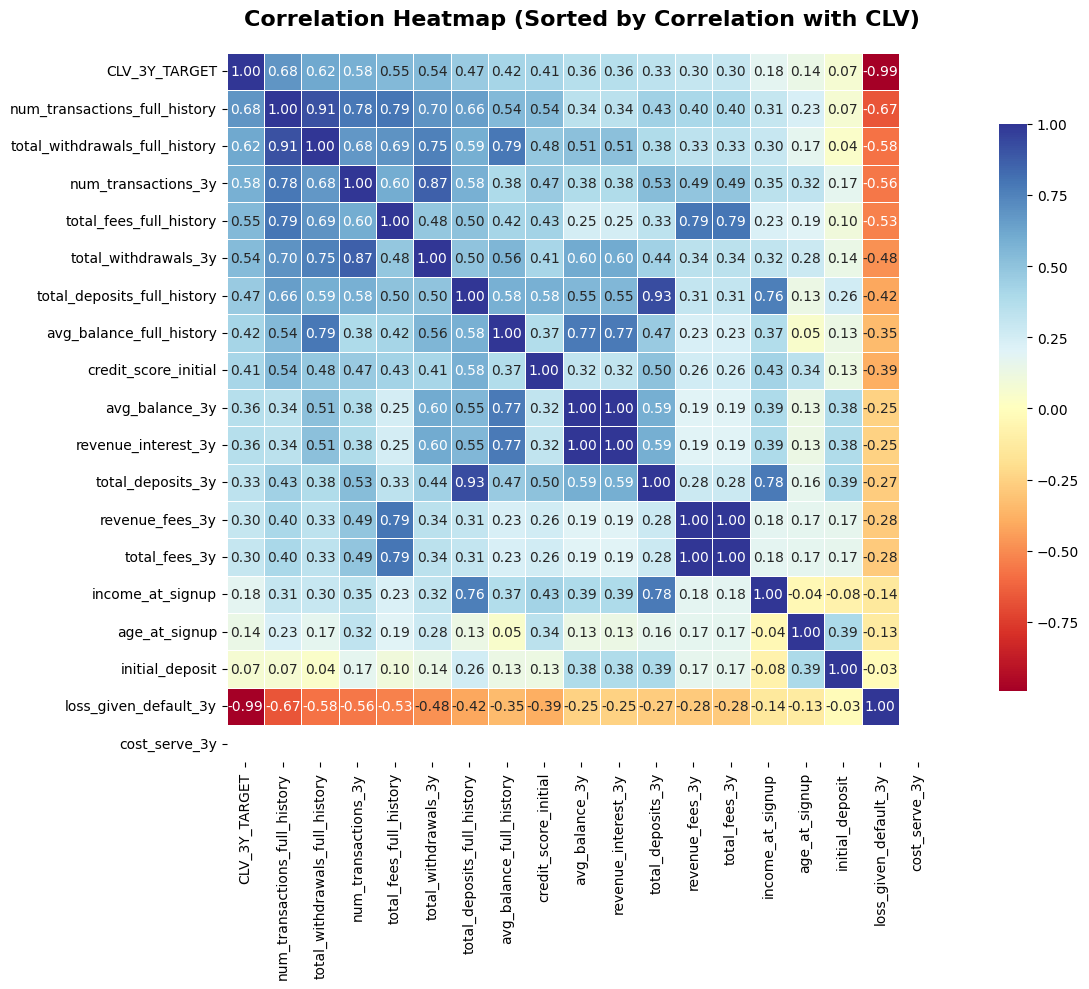

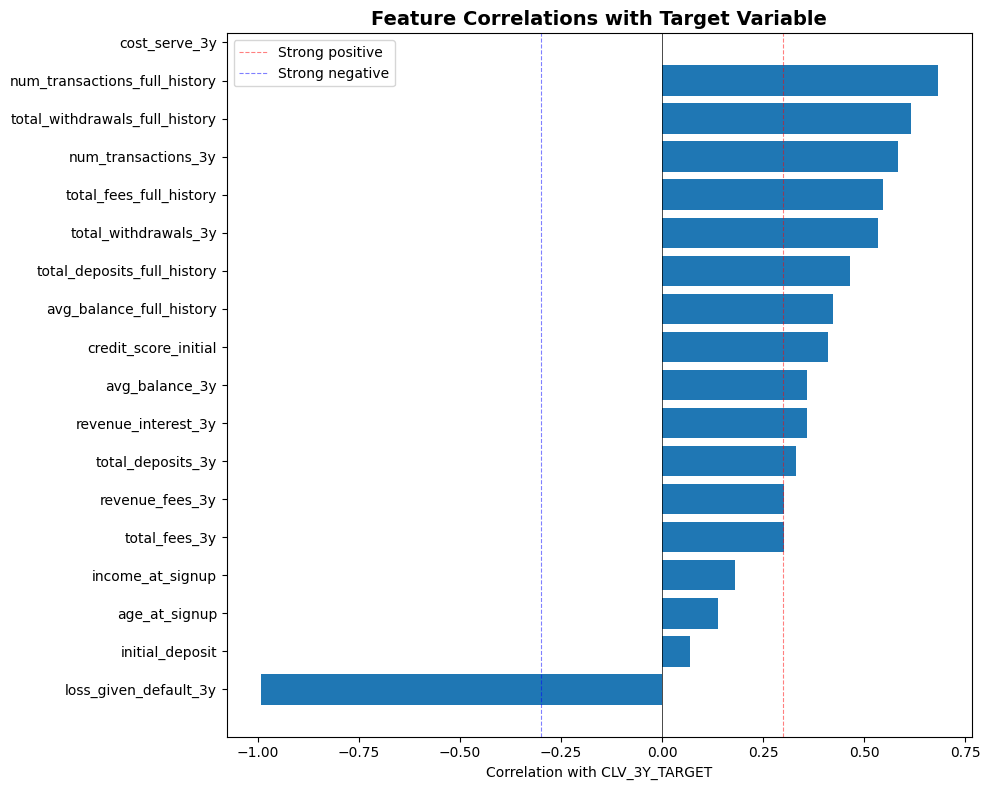

In [ ]:
# Set size of chart
plt.figure(figsize=(14, 10))

# Calculate correlations with CLV
clv_correlations = df_numerical.corr(numeric_only=True)[target_col].sort_values(ascending=False)

# Create a DataFrame sorted by correlation with CLV
sorted_features = clv_correlations.index.tolist()
sorted_corr = df_numerical[sorted_features].corr()

# Plot
sns.heatmap(sorted_corr, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlBu',
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title('Correlation Heatmap (Sorted by Correlation with CLV)', 
          fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Method 3: Just show correlations with CLV
plt.figure(figsize=(10, 8))
clv_corr_sorted = clv_correlations.drop(target_col).sort_values()

plt.barh(range(len(clv_corr_sorted)), clv_corr_sorted.values)
plt.yticks(range(len(clv_corr_sorted)), clv_corr_sorted.index)
plt.xlabel('Correlation with CLV_3Y_TARGET')
plt.title('Feature Correlations with Target Variable', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.axvline(x=0.3, color='red', linestyle='--', linewidth=0.8, alpha=0.5, label='Strong positive')
plt.axvline(x=-0.3, color='blue', linestyle='--', linewidth=0.8, alpha=0.5, label='Strong negative')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/yd/51w8f6v16k72p9k_6y8v7xsw0000gn/T/ipykernel_86858/2334209713.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_categorical,
/var/folders/yd/51w8f6v16k72p9k_6y8v7xsw0000gn/T/ipykernel_86858/2334209713.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_categorical,
/var/folders/yd/51w8f6v16k72p9k_6y8v7xsw0000gn/T/ipykernel_86858/2334209713.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_categorical,
/var/folders/yd/51w8f6v16k72p9k_6y8v7xsw0000gn/T/ipykernel_86858/2334209713.py:27: FutureWarning:

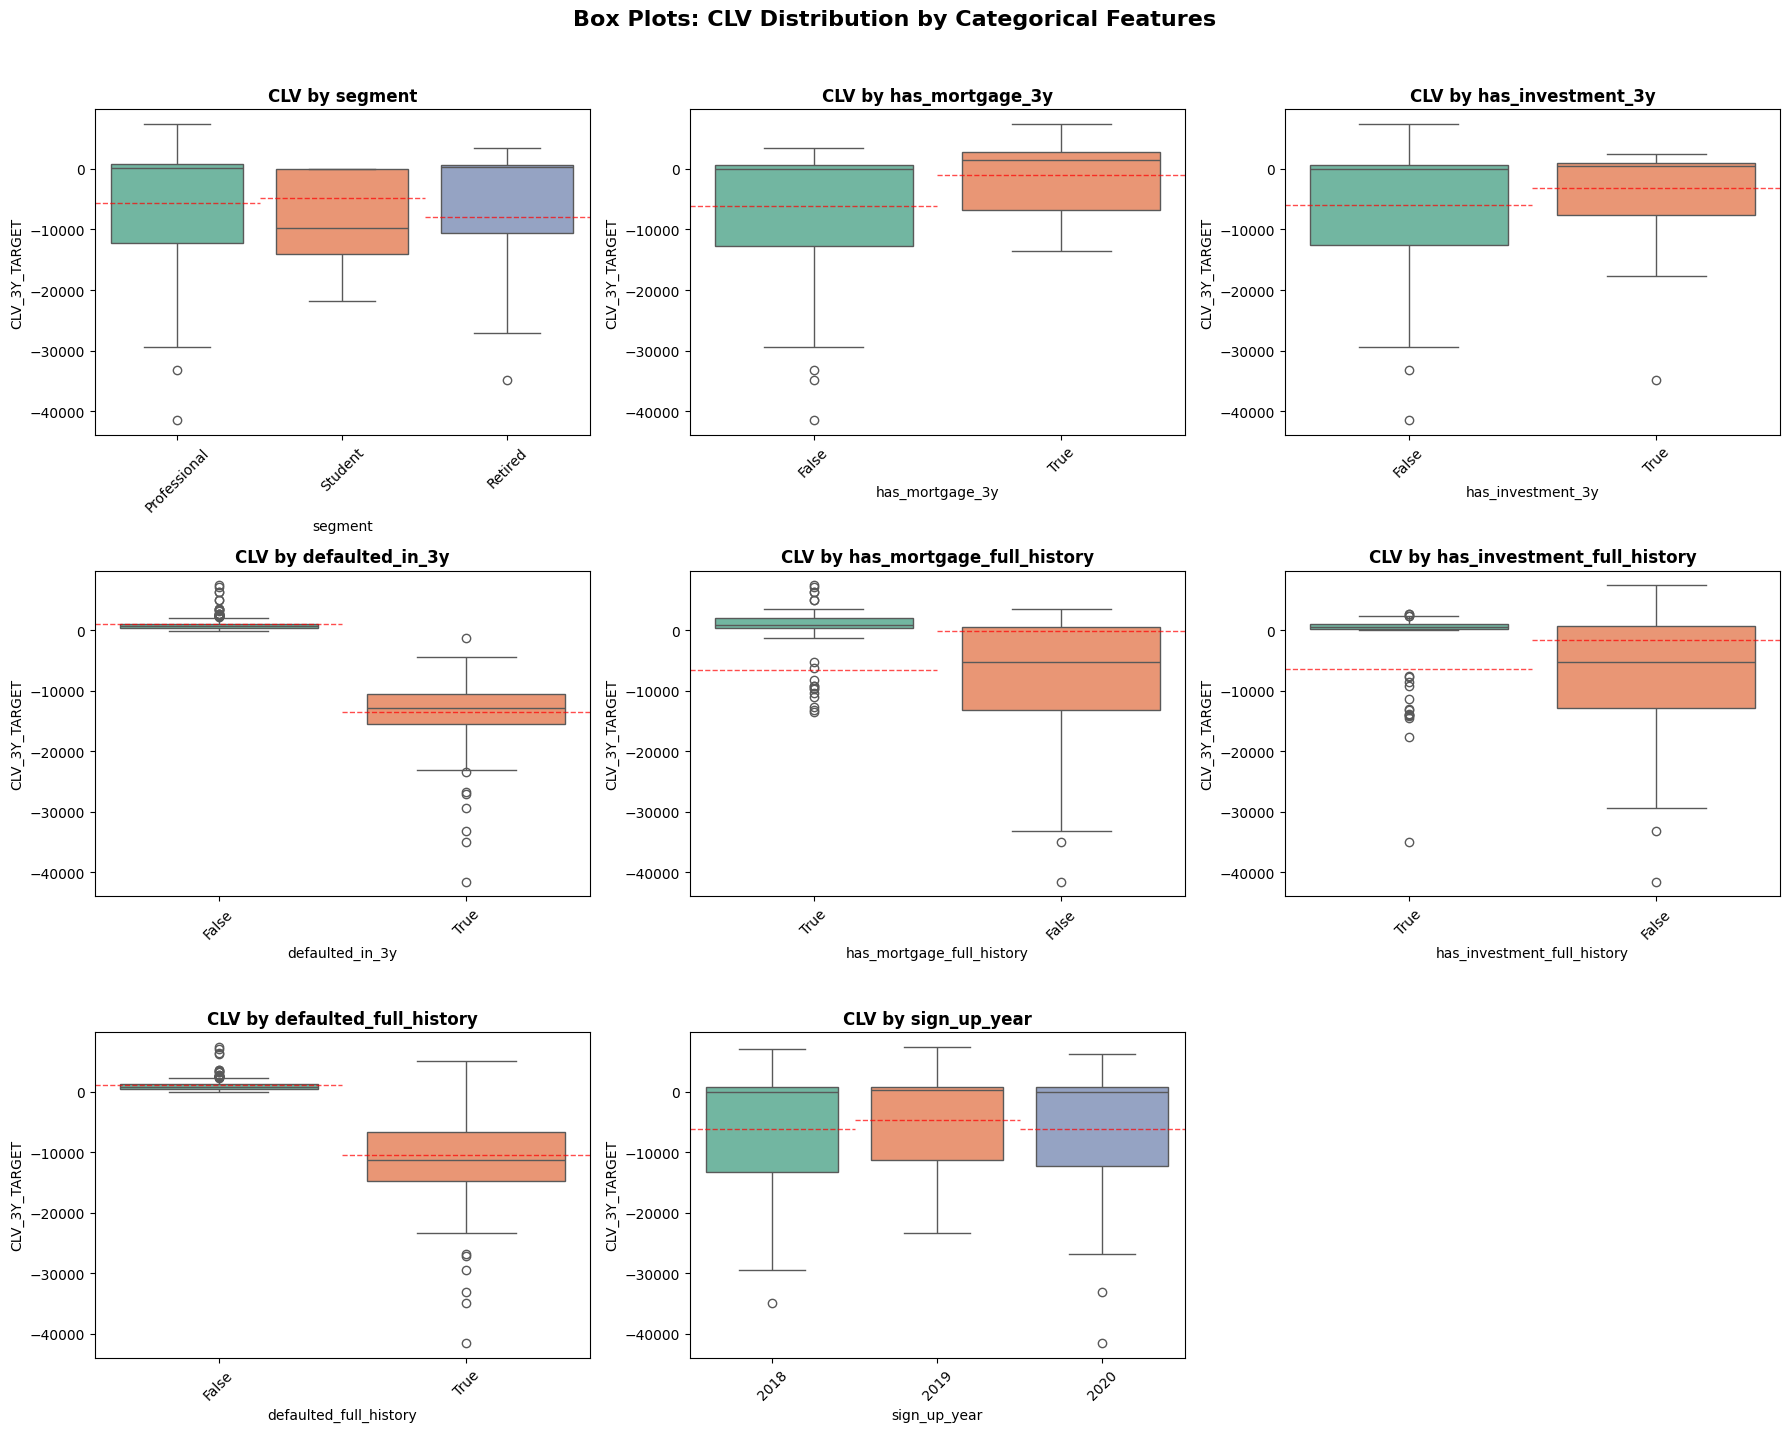

In [25]:
# Assuming df_categorical already exists
# If not, create it:
categorical_cols = [
    'segment', 'has_mortgage_3y', 'has_investment_3y',
    'defaulted_in_3y', 'has_mortgage_full_history',
    'has_investment_full_history', 'defaulted_full_history',
    'sign_up_year', target_col
]
df_categorical = df[categorical_cols].copy()

# Convert binary columns to proper categorical for better visualization
binary_cols = [col for col in df_categorical.columns if 'has_' in col or 'defaulted' in col]
for col in binary_cols:
    if col in df_categorical.columns:
        df_categorical[col] = df_categorical[col].astype(str)

# Method 1: Individual Box Plots
categorical_features = [col for col in df_categorical.columns if col != target_col]

# Create subplots for all categorical features
fig, axes = plt.subplots(3, 3, figsize=(18, 14))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features):
    if idx < len(axes):
        # Create box plot
        sns.boxplot(data=df_categorical, 
                    x=feature, 
                    y=target_col, 
                    ax=axes[idx],
                    palette='Set2')
        
        axes[idx].set_title(f'CLV by {feature}', fontweight='bold')
        axes[idx].set_xlabel(feature)
        axes[idx].set_ylabel('CLV_3Y_TARGET')
        axes[idx].tick_params(axis='x', rotation=45)
        
        # Add mean line
        means = df_categorical.groupby(feature)[target_col].mean()
        for i, (cat, mean_val) in enumerate(means.items()):
            axes[idx].axhline(y=mean_val, xmin=i/len(means), xmax=(i+1)/len(means), 
                            color='red', linestyle='--', alpha=0.7, linewidth=1)

# Remove empty subplots
for idx in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Box Plots: CLV Distribution by Categorical Features', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()